# TME2

In [178]:
import gym
import gridworld

In [179]:
actionToMove = {0:'bottom', 1:'top', 2:'left', 3:'right'}
moveToAction = {'bottom':0, 'top':1, 'left':2, 'right':3}

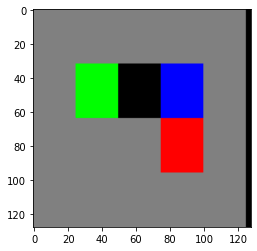

In [191]:
env = gym.make('gridworld-v0')
env.setPlan("gridworldPlans/plan.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})

a = env.render()



In [244]:
V = {}

for etat in mdp[1]:
    V[etat] = {}
    V[etat]['score'] = 0.0
    V[etat]['action'] = None

In [247]:
for etat, dic in V.items():
    oldScore = dic['score']
    maxScore = -np.inf
    bestAction = None
    
    #Calcul du score pour chaque action possible
    for action, val in mdp[1][etat].items():
        score = 0
        
        #Calcul du score de l'action courante
        for possibility in val:
            
            proba = possibility[0]
            reward = possibility[2]
            score += proba*reward
        
        #SCore a modif avec val de V
        if(score>maxScore):
            maxScore = score
            bestAction = action
            
    V[etat]['score'] = maxScore
    V[etat]['action'] = bestAction

In [248]:
V

{'[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]': {'score': -0.001,
  'action': 1},
 '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]': {'score': 0.7998000000000001,
  'action': 2}}

In [246]:
V

{'[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]': {'score': -0.001,
  'action': 1},
 '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]': {'score': 0.7998000000000001,
  'action': 2}}

In [224]:
score = 0
for possibility in action:
    proba = possibility[0]
    reward = possibility[2]
    score += proba*reward


In [226]:
action

[(0.8,
  '[[1, 1, 1, 1, 1], [1, 3, 0, 0, 1], [1, 1, 1, 2, 1], [1, 1, 1, 1, 1]]',
  -1,
  True),
 (0.1,
  '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
  -0.001,
  False),
 (0.1,
  '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
  -0.001,
  False)]

In [225]:
score

-0.8002

In [223]:
action

[(0.8,
  '[[1, 1, 1, 1, 1], [1, 3, 0, 0, 1], [1, 1, 1, 2, 1], [1, 1, 1, 1, 1]]',
  -1,
  True),
 (0.1,
  '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
  -0.001,
  False),
 (0.1,
  '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
  -0.001,
  False)]

In [ ]:
for action, val in mdp[1][etat]:
    #Code

In [214]:
action = mdp[1][etat][0]

In [218]:
val = 0

In [215]:
action

[(0.8,
  '[[1, 1, 1, 1, 1], [1, 3, 0, 0, 1], [1, 1, 1, 2, 1], [1, 1, 1, 1, 1]]',
  -1,
  True),
 (0.1,
  '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
  -0.001,
  False),
 (0.1,
  '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
  -0.001,
  False)]

In [210]:
etat = list(V.keys())[0]

In [216]:
score = V[etat]

In [217]:
score

0.0

In [192]:
mdp = env.getMDP()

In [193]:
len(mdp[0])

4

In [194]:
len(mdp[1])

2

In [198]:
key = list(mdp[1].keys())

In [202]:
key[0]

'[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]'

In [201]:
mdp[1][key[0]][0]

{0: [(0.8,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 0, 1], [1, 1, 1, 2, 1], [1, 1, 1, 1, 1]]',
   -1,
   True),
  (0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False),
  (0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False)],
 1: [(0.8,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False),
  (0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False),
  (0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False)],
 2: [(0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 0, 1], [1, 1, 1, 2, 1], [1, 1, 1, 1, 1]]',
   -1,
   True),
  (0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 2, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False),
  (0.8,
   '[[1, 1, 1, 1, 1], [1, 3, 2, 0, 1], [1, 1, 1, 5, 1], [1, 1, 1, 1, 1]]',
   -0.001,
   False)],
 3: [(0.1,
   '[[1, 1, 1, 1, 1], [1, 3, 0, 0, 1], [1,

In [163]:
mdp = env.getMDP()

In [164]:
key = list(mdp[1].keys())

In [172]:
triplet=mdp[1][key[0]][0]

In [175]:
len(triplet[0])

4

In [170]:
mdp[1][key[0]][0][0]

(0.8,
 '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]',
 -0.001,
 False)

In [157]:
key[1]

'[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 2, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]'

In [159]:
key[3]

'[[1, 1, 1, 1, 1, 1], [1, 0, 0, 2, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]'

In [156]:
len(key)

9

In [111]:
mdp[1]['[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]'].keys()

dict_keys([0, 1, 2, 3])

In [ ]:
'[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]'

In [104]:
mdp[1]

{'[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]': {0: [(0.8,
    '[[1, 1, 1, 1], [1, 3, 0, 1], [1, 1, 2, 1], [1, 1, 1, 1]]',
    -1,
    True),
   (0.1,
    '[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]',
    -0.001,
    False),
   (0.1, '[[1, 1, 1, 1], [1, 2, 0, 1], [1, 1, 5, 1], [1, 1, 1, 1]]', 1, True)],
  1: [(0.8,
    '[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]',
    -0.001,
    False),
   (0.1,
    '[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]',
    -0.001,
    False),
   (0.1, '[[1, 1, 1, 1], [1, 2, 0, 1], [1, 1, 5, 1], [1, 1, 1, 1]]', 1, True)],
  2: [(0.1,
    '[[1, 1, 1, 1], [1, 3, 0, 1], [1, 1, 2, 1], [1, 1, 1, 1]]',
    -1,
    True),
   (0.1,
    '[[1, 1, 1, 1], [1, 3, 2, 1], [1, 1, 5, 1], [1, 1, 1, 1]]',
    -0.001,
    False),
   (0.8, '[[1, 1, 1, 1], [1, 2, 0, 1], [1, 1, 5, 1], [1, 1, 1, 1]]', 1, True)],
  3: [(0.1,
    '[[1, 1, 1, 1], [1, 3, 0, 1], [1, 1, 2, 1], [1, 1, 1, 1]]',
    -1,
    True),
   (0.1,
    '[[1, 1, 1,

In [75]:
env.step(moveToAction['top'])
env.render(mode='human')

  (North)
      
      
      
      
      
      


In [3]:
import matplotlib

matplotlib.use("TkAgg")
import gym
import gridworld
from gym import wrappers, logger
import numpy as np
import copy


class RandomAgent(object):
    """The world's simplest agent!"""

    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()




env = gym.make("gridworld-v0")
env.setPlan("gridworldPlans/plan0.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})

env.seed(0)  # Initialise le seed du pseudo-random
print(env.action_space)  # Quelles sont les actions possibles
print(env.step(1))  # faire action 1 et retourne l'observation, le reward, et un done un booleen (jeu fini ou pas)
env.render()  # permet de visualiser la grille du jeu 
env.render(mode="human") #visualisation sur la console
statedic, mdp = env.getMDP()  # recupere le mdp : statedic
print("Nombre d'etats : ",len(statedic))  # nombre d'etats ,statedic : etat-> numero de l'etat
state, transitions = list(mdp.items())[0]
print(state)  # un etat du mdp
print(transitions)  # dictionnaire des transitions pour l'etat :  {action-> [proba,etat,reward,done]}

# Execution avec un Agent
agent = RandomAgent(env.action_space)


episode_count = 1000
reward = 0
done = False
rsum = 0
FPS = 0.0001
for i in range(episode_count):
    obs = env.reset()
    env.verbose = (i % 100 == 0 and i > 0)  # afficher 1 episode sur 100
    if env.verbose:
        env.render(FPS)
    j = 0
    rsum = 0
    while True:
        action = agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        rsum += reward
        j += 1
        if env.verbose:
            env.render(FPS)
        if done:
            print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
            break

print("done")
env.close()

Discrete(4)
(array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 3, 1],
       [1, 0, 1, 0, 5, 1],
       [1, 0, 0, 0, 2, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]), -0.001, False, {})

      
      
      
      
      
      
Nombre d'etats :  11
[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
{0: [(0.8, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -0.001, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -0.001, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 2, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -0.001, False)], 1: [(0.8, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 2, 1], [1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -1, True), (0.1, '[[1, 1, 1, 1, 1, 1], [1

Episode : 200 rsum=-1, 1 actions
Episode : 201 rsum=-1.002, 3 actions
Episode : 202 rsum=0.992, 9 actions
Episode : 203 rsum=0.987, 14 actions
Episode : 204 rsum=-1.008, 9 actions
Episode : 205 rsum=0.939, 62 actions
Episode : 206 rsum=-1.01, 11 actions
Episode : 207 rsum=-1.003, 4 actions
Episode : 208 rsum=-1, 1 actions
Episode : 209 rsum=-1.003, 4 actions
Episode : 210 rsum=-1.001, 2 actions
Episode : 211 rsum=0.962, 39 actions
Episode : 212 rsum=-1.007, 8 actions
Episode : 213 rsum=-1, 1 actions
Episode : 214 rsum=-1, 1 actions
Episode : 215 rsum=-1, 1 actions
Episode : 216 rsum=0.952, 49 actions
Episode : 217 rsum=-1.001, 2 actions
Episode : 218 rsum=-1.002, 3 actions
Episode : 219 rsum=-1, 1 actions
Episode : 220 rsum=-1.007, 8 actions
Episode : 221 rsum=0.993, 8 actions
Episode : 222 rsum=-1, 1 actions
Episode : 223 rsum=-1.005, 6 actions
Episode : 224 rsum=0.976, 25 actions
Episode : 225 rsum=0.977, 24 actions
Episode : 226 rsum=-1.001, 2 actions
Episode : 227 rsum=-1, 1 action

Episode : 500 rsum=-1.001, 2 actions
Episode : 501 rsum=-1, 1 actions
Episode : 502 rsum=-1.002, 3 actions
Episode : 503 rsum=-1, 1 actions
Episode : 504 rsum=0.993, 8 actions
Episode : 505 rsum=-1, 1 actions
Episode : 506 rsum=-1.002, 3 actions
Episode : 507 rsum=-1.005, 6 actions
Episode : 508 rsum=-1, 1 actions
Episode : 509 rsum=0.995, 6 actions
Episode : 510 rsum=-1.1300000000000001, 131 actions
Episode : 511 rsum=-1, 1 actions
Episode : 512 rsum=-1, 1 actions
Episode : 513 rsum=0.991, 10 actions
Episode : 514 rsum=-1.001, 2 actions
Episode : 515 rsum=-1.003, 4 actions
Episode : 516 rsum=-1.017, 18 actions
Episode : 517 rsum=-1.001, 2 actions
Episode : 518 rsum=0.986, 15 actions
Episode : 519 rsum=0.983, 18 actions
Episode : 520 rsum=-1.003, 4 actions
Episode : 521 rsum=-1.001, 2 actions
Episode : 522 rsum=-1.022, 23 actions
Episode : 523 rsum=-1, 1 actions
Episode : 524 rsum=-1.001, 2 actions
Episode : 525 rsum=-1.005, 6 actions
Episode : 526 rsum=-1.003, 4 actions
Episode : 527 

Episode : 800 rsum=-1.003, 4 actions
Episode : 801 rsum=-1.03, 31 actions
Episode : 802 rsum=-1.001, 2 actions
Episode : 803 rsum=-1.005, 6 actions
Episode : 804 rsum=-1, 1 actions
Episode : 805 rsum=0.995, 6 actions
Episode : 806 rsum=0.995, 6 actions
Episode : 807 rsum=-1.001, 2 actions
Episode : 808 rsum=0.943, 58 actions
Episode : 809 rsum=-1, 1 actions
Episode : 810 rsum=0.993, 8 actions
Episode : 811 rsum=-1.002, 3 actions
Episode : 812 rsum=-1.002, 3 actions
Episode : 813 rsum=-1.017, 18 actions
Episode : 814 rsum=-1.004, 5 actions
Episode : 815 rsum=-1, 1 actions
Episode : 816 rsum=-1.001, 2 actions
Episode : 817 rsum=-1.002, 3 actions
Episode : 818 rsum=-1.004, 5 actions
Episode : 819 rsum=-1.003, 4 actions
Episode : 820 rsum=-1.003, 4 actions
Episode : 821 rsum=-1, 1 actions
Episode : 822 rsum=-1, 1 actions
Episode : 823 rsum=0.951, 50 actions
Episode : 824 rsum=-1.004, 5 actions
Episode : 825 rsum=-1.001, 2 actions
Episode : 826 rsum=-1.002, 3 actions
Episode : 827 rsum=-1, 